In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot
from matplotlib import pyplot as plt
import pickle
import gzip
from PIL import Image
import os
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sn
import math

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Mnist data Preprocessing

In [2]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
# data is partitioned and fetched from the file
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()
# target and feature are separated
TrainData, Train_Target=training_data
ValData, Val_Target=validation_data
MnistData,MnistTarget=test_data
print(MnistData.shape)
print(MnistTarget)

(10000, 784)
(10000,)


# Usps data Preprocessing

In [3]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []
#loop for reading the images
for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            #add the image features and target
            USPSMat.append(imgdata)
            USPSTar.append(j)
USPSData=np.asarray(USPSMat)
USPSTarget=np.asarray(USPSTar)
print(USPSData.shape)
print(USPSTarget.shape)

(19999, 784)
(19999,)


# Accuracy Calculation

In [4]:
#Calculate Erms 
def ERMS(Predicted,Actual):
    total=0.0
    counter=0
    for i in range(0,len(Predicted)):
        total+=math.pow((Actual[i]-Predicted[i]),2)
        #count for match
        if (int(np.around(Predicted[i])) == Actual[i]):
            counter+=1
    Accuracy=(counter*100/len(Predicted))
    #print(counter)
    Erms=math.sqrt(total/len(Predicted))
    return Erms, Accuracy

# USPS and Mnist Target for testing in One Hot Vector Form

In [5]:
def oneHot(z):
    z=keras.utils.to_categorical(z,num_classes=10)
    return z

In [6]:
USPSTestTarget=oneHot(USPSTarget)

In [7]:
MnistTestTarget=oneHot(MnistTarget)
TrainTarget=oneHot(Train_Target)
ValTarget=oneHot(Val_Target)

# Function for Training Softmax Logistic regression

In [8]:
#Generate softmax Target
def softmax(z):
    exp=np.exp(z)
    add=np.sum(exp,axis=1)
    target=(exp.T/add).T
    return target
#Logistic Regression
def logistic(feature,weight):
    z=np.dot(feature,weight)
    predicted=softmax(z)
    return predicted

# Training Logistic Model on Mnist

In [9]:
# initialise weights
Weights=np.zeros((len(TrainData[0]),10))
dataset=len(TrainData)
LearningRate=0.3
lamda=0.01
# loop for epoch
for j in range(0,100):
    PredictedTarget=logistic(TrainData,Weights)
    deltaW=(-1/dataset)*np.dot(np.transpose(TrainData),(TrainTarget-PredictedTarget)) +(lamda*Weights)
    #updating weights
    Weights=Weights-(LearningRate*deltaW)
    # converting target back from one Hot vector form
    PredictTarget=np.argmax(PredictedTarget,axis=1)
TrainingErms, TrainAccu=ERMS(PredictTarget,Train_Target)
print("Training Erms:"+str(TrainingErms))
print("Training Accuracy:"+str(TrainAccu))

Training Erms:1.463796433934719
Training Accuracy:88.08


# Testing And Validation Logistic on Mnist Data

Validation Erms:1.417321417322126
Logisctic Validation Accuracy:89.45
Testing Erms:1.4135062787267696
Logistic Mnist Testing Accuracy:89.11
[[ 952    0    2    3    0    1   14    1    7    0]
 [   0 1103    2    4    1    2    4    0   19    0]
 [  13   13  868   22   18    0   20   24   46    8]
 [   6    1   16  892    1   35    7   15   24   13]
 [   2    7    5    0  892    1   11    2    9   53]
 [  20   10    5   50   18  701   19   10   45   14]
 [  17    3    8    2   11   16  894    1    6    0]
 [   3   25   31    3   11    0    1  906    5   43]
 [   9   12   12   29   10   25   15   14  831   17]
 [  13    9    9   12   46   14    1   26    7  872]]


Text(69,0.5,'Actual')

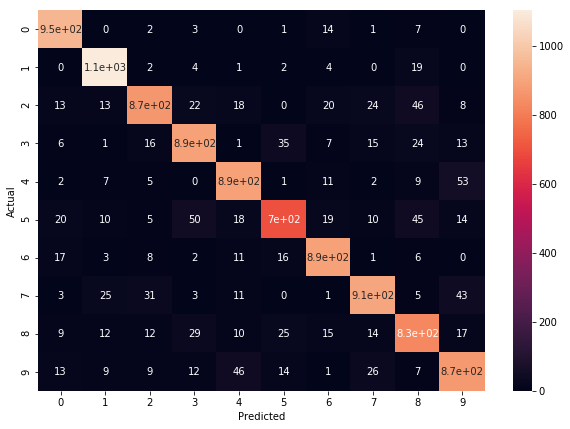

In [10]:
PredictedValTarget=logistic(ValData,Weights)
PredictedValTarget=np.argmax(PredictedValTarget,axis=1)
ValidationErms, ValAccu=ERMS(PredictedValTarget,Val_Target)
print("Validation Erms:"+str(ValidationErms))
print("Logisctic Validation Accuracy:"+str(ValAccu))

PredictedTestTarget=logistic(MnistData,Weights)
Mnist_LogisticTarget=np.argmax(PredictedTestTarget,axis=1)
TestingErms, L_Mnist_Accu=ERMS(Mnist_LogisticTarget,MnistTarget)
# printing Erms and Accuracy
print("Testing Erms:"+str(TestingErms))
print("Logistic Mnist Testing Accuracy:"+str(L_Mnist_Accu))

# confusion matrix
cm=confusion_matrix(MnistTarget,Mnist_LogisticTarget)
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Logistic Testing on USPS DATA

USPS Erms: 3.6256940415407564
Logistic USPS Accuracy: 34.47672383619181
[[ 629    4  396   50  294   83   90   39  120  295]
 [ 259  308  126  313  295   41   45  280  317   16]
 [ 246   31 1141  131   74   63   99  100   92   22]
 [ 129    5  128 1203   32  217   37   61  112   76]
 [  84   90   38   52 1063  112   34  127  272  128]
 [ 195   21  218  187   50  987  135   79   91   37]
 [ 424   12  347  100  109  183  683   30   81   31]
 [ 202  227  339  413   72   82   38  291  286   50]
 [ 252   35  153  202  143  521  127   36  444   87]
 [  63  202  180  437  170   78   16  371  337  146]]


Text(69,0.5,'Actual')

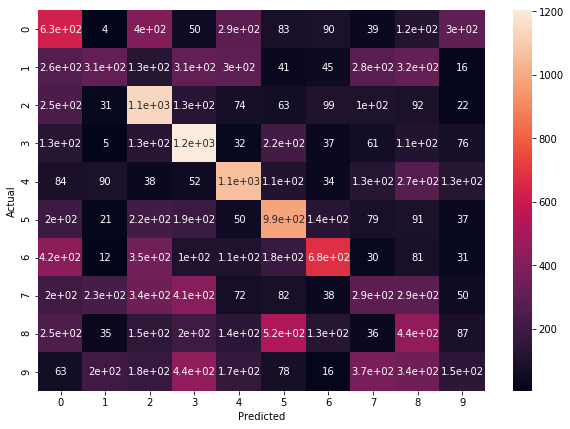

In [11]:
PredictedUSPSTarget=logistic(USPSData,Weights)
USPS_LogisticTarget=np.argmax(PredictedUSPSTarget,axis=1)
USPSErms, L_USPSAccu=ERMS(USPS_LogisticTarget,USPSTarget)
print("USPS Erms:",USPSErms)
print("Logistic USPS Accuracy:",L_USPSAccu)

#Confusion Matrix
cm=confusion_matrix(USPSTarget,USPS_LogisticTarget)
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Neural Network Model

In [12]:
Hidden_layer=100
Output_layer=10
Learning_rate=0.03
epoch=300
batchsize=60
imagesize=28*28
# model definition
model=keras.Sequential()
#adding hidden layer
model.add(keras.layers.Dense(Hidden_layer,activation='sigmoid',input_shape=(imagesize,)))
#adding output layer
model.add(keras.layers.Dense(Output_layer,activation='softmax'))
# compiling the model
model.compile(optimizer=tf.train.GradientDescentOptimizer(Learning_rate),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(TrainData,TrainTarget,epochs=epoch,batch_size=batchsize,validation_data=(ValData,ValTarget))

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 2s 46us/step - loss: 1.3140 - acc: 0.7265 - val_loss: 0.7258 - val_acc: 0.8584
Epoch 2/300
50000/50000 [==============================] - 2s 43us/step - loss: 0.6197 - acc: 0.8573 - val_loss: 0.4808 - val_acc: 0.8847
Epoch 3/300
50000/50000 [==============================] - 2s 42us/step - loss: 0.4747 - acc: 0.8789 - val_loss: 0.3989 - val_acc: 0.8973
Epoch 4/300
50000/50000 [==============================] - 2s 41us/step - loss: 0.4130 - acc: 0.8901 - val_loss: 0.3591 - val_acc: 0.9022
Epoch 5/300
50000/50000 [==============================] - 2s 40us/step - loss: 0.3782 - acc: 0.8967 - val_loss: 0.3346 - val_acc: 0.9061
Epoch 6/300
50000/50000 [==============================] - 2s 39us/step - loss: 0.3553 - acc: 0.9011 - val_loss: 0.3165 - val_acc: 0.9098
Epoch 7/300
50000/50000 [==============================] - 2s 39us/step - loss: 0.3383 - acc: 0.9043 - val_loss: 0.3035 - 

Epoch 118/300
50000/50000 [==============================] - 2s 41us/step - loss: 0.0810 - acc: 0.9784 - val_loss: 0.1039 - val_acc: 0.9703
Epoch 119/300
50000/50000 [==============================] - 2s 40us/step - loss: 0.0803 - acc: 0.9786 - val_loss: 0.1039 - val_acc: 0.9698
Epoch 120/300
50000/50000 [==============================] - 2s 41us/step - loss: 0.0798 - acc: 0.9786 - val_loss: 0.1032 - val_acc: 0.9703
Epoch 121/300
50000/50000 [==============================] - 2s 40us/step - loss: 0.0792 - acc: 0.9791 - val_loss: 0.1029 - val_acc: 0.9699
Epoch 122/300
50000/50000 [==============================] - 2s 41us/step - loss: 0.0786 - acc: 0.9791 - val_loss: 0.1029 - val_acc: 0.9700
Epoch 123/300
50000/50000 [==============================] - 2s 41us/step - loss: 0.0780 - acc: 0.9792 - val_loss: 0.1021 - val_acc: 0.9702
Epoch 124/300
50000/50000 [==============================] - 2s 41us/step - loss: 0.0775 - acc: 0.9794 - val_loss: 0.1017 - val_acc: 0.9702
Epoch 125/300
50000/

50000/50000 [==============================] - 2s 39us/step - loss: 0.0394 - acc: 0.9913 - val_loss: 0.0812 - val_acc: 0.9763
Epoch 235/300
50000/50000 [==============================] - 2s 40us/step - loss: 0.0393 - acc: 0.9913 - val_loss: 0.0807 - val_acc: 0.9762
Epoch 236/300
50000/50000 [==============================] - 2s 40us/step - loss: 0.0391 - acc: 0.9915 - val_loss: 0.0812 - val_acc: 0.9760
Epoch 237/300
50000/50000 [==============================] - 2s 39us/step - loss: 0.0389 - acc: 0.9914 - val_loss: 0.0805 - val_acc: 0.9762
Epoch 238/300
50000/50000 [==============================] - 2s 39us/step - loss: 0.0387 - acc: 0.9915 - val_loss: 0.0805 - val_acc: 0.9763
Epoch 239/300
50000/50000 [==============================] - 2s 39us/step - loss: 0.0385 - acc: 0.9915 - val_loss: 0.0801 - val_acc: 0.9760
Epoch 240/300
50000/50000 [==============================] - 2s 39us/step - loss: 0.0383 - acc: 0.9917 - val_loss: 0.0804 - val_acc: 0.9764
Epoch 241/300
50000/50000 [=======

# Loss and Accuracy change w.r.t Epochs

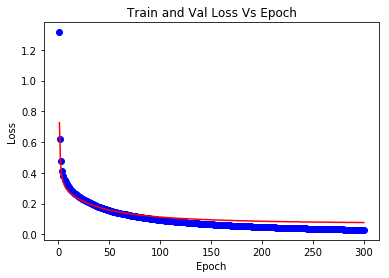

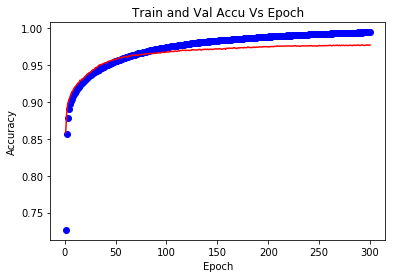

In [14]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Val Loss Vs Epoch')
plt.show()
plt.clf()
plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Val Accu Vs Epoch')
plt.show()

# NN Accuracy of Mnist Test Data

10000/10000 [==============================] - 0s 19us/step
Loss 0.07426086962409317
NN Mnist Accu: 0.9761
[[ 971    0    0    2    0    2    3    1    1    0]
 [   0 1126    3    0    0    1    2    1    2    0]
 [   6    1 1004    4    1    2    3    7    4    0]
 [   0    0    7  989    0    4    0    3    5    2]
 [   1    0    1    1  954    1    5    2    2   15]
 [   4    1    0   13    1  862    5    0    3    3]
 [   6    2    1    0    2    5  938    1    3    0]
 [   2    4    8    7    0    0    0  998    2    7]
 [   4    0    3    5    2    5    4    4  947    0]
 [   3    4    1    9    8    4    0    7    1  972]]


Text(69,0.5,'Actual')

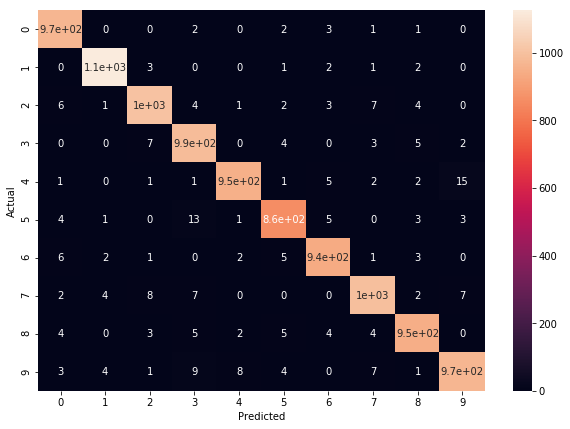

In [15]:
Loss, NN_Mnist_accu=model.evaluate(MnistData,MnistTestTarget)
NN_Mnist_PredictedTarget=np.argmax(model.predict(MnistData),axis=1)
print("Loss",Loss)
print("NN Mnist Accu:",NN_Mnist_accu)

#Confusion Matrix
cm=confusion_matrix(MnistTarget,NN_Mnist_PredictedTarget)
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# NN Accuracy Of USPS Test Data

19999/19999 [==============================] - 0s 20us/step
Loss 3.249616170550616
NN USPS Accu: 0.4468223411096049
[[ 574    0   99   86  108  107   57  142  299  528]
 [  33  429  353  108  249  130   25  515  103   55]
 [  74   12 1482   89   26  126   57   44   75   14]
 [  35    5  161 1357   15  326    3   24   64   10]
 [  10   25   41   19  907  168   20  415  311   84]
 [  53    4  190  123   14 1340   43   45  171   17]
 [ 144    7  386   71   34  167 1037   15   61   78]
 [  42   83  147  434   71  108    9  830  258   18]
 [ 168    5  141  310   52  405   85  104  697   33]
 [  11   25   61  394  149   37    6  556  478  283]]


Text(69,0.5,'Actual')

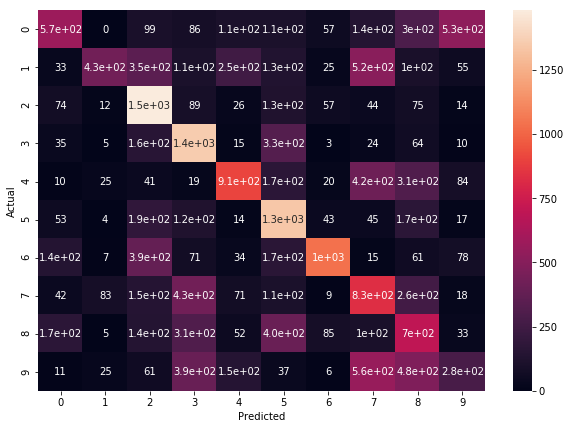

In [16]:
Loss, NN_USPS_accu=model.evaluate(USPSData,USPSTestTarget)
NN_USPS_PredictedTarget=np.argmax(model.predict(USPSData),axis=1)
print("Loss",Loss)
print("NN USPS Accu:",NN_USPS_accu)

# Confusion Matrix
cm=confusion_matrix(USPSTarget,NN_USPS_PredictedTarget)
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# SVM Model

In [17]:
from sklearn.svm import SVC

In [18]:
# defining the SVM Model
SVM_model=SVC(kernel='rbf',C=2,gamma=0.05)
history2=SVM_model.fit(TrainData,Train_Target)

# SVM Validation on Mnist Data Set

Erms: 0.5770615218501404
SVM Val Accu 98.35
[[ 982    0    5    0    0    0    1    0    1    2]
 [   0 1056    1    2    0    0    2    1    2    0]
 [   1    0  980    0    0    1    0    3    5    0]
 [   0    0    3 1007    0    6    0    1   11    2]
 [   0    5    0    0  969    0    0    1    2    6]
 [   2    0    3   10    2  887    4    1    5    1]
 [   2    0    0    0    1    1  963    0    0    0]
 [   0    6    5    0    1    0    0 1071    0    7]
 [   1    0    4    4    0    3    1    0  995    1]
 [   2    3    2    7    8    3    0    5    6  925]]


Text(69,0.5,'Actual')

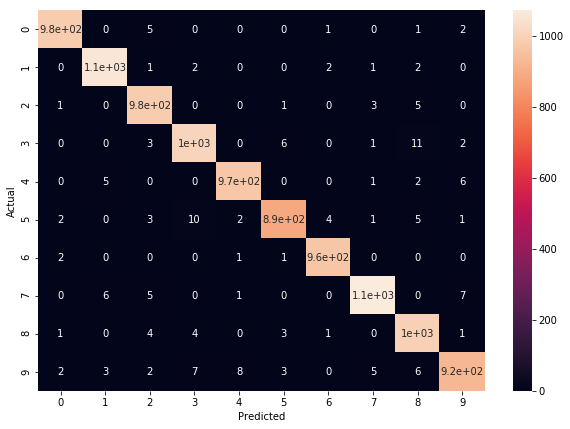

In [19]:
SVM_PredictedTarget=SVM_model.predict(ValData)
Erms, SVM_Accu=ERMS(SVM_PredictedTarget,Val_Target)
print("Erms:",Erms)
print("SVM Val Accu",SVM_Accu)

# confusion matrix
cm=confusion_matrix(Val_Target,SVM_PredictedTarget)
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# SVM Testing on Mnist Test Data

Erms: 0.5917769850205397
SVM Mnist Accu: 98.27
[[ 974    0    1    0    0    1    1    1    2    0]
 [   0 1128    3    1    0    1    0    1    1    0]
 [   4    0 1015    1    1    0    0    6    5    0]
 [   0    0    1  997    0    3    0    5    4    0]
 [   0    1    3    0  964    0    4    0    2    8]
 [   2    0    1    7    1  872    3    1    4    1]
 [   5    2    0    0    2    3  945    0    1    0]
 [   0    3    9    1    1    0    0 1004    2    8]
 [   2    0    1    6    1    2    0    2  958    2]
 [   4    4    2    8    7    2    0    6    6  970]]


Text(69,0.5,'Actual')

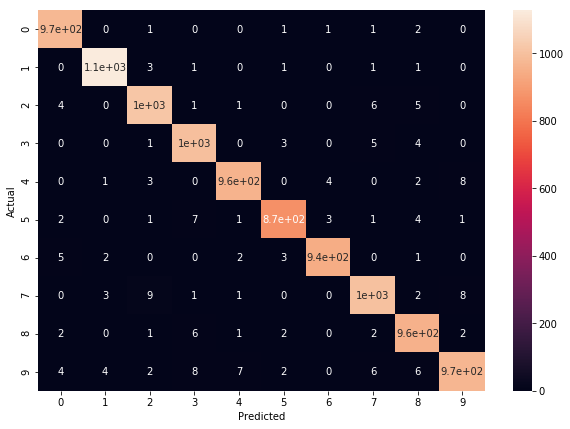

In [20]:
SVM_Mnist_PredictedTarget=SVM_model.predict(MnistData)
Erms, SVM_Mnist_Accu=ERMS(SVM_Mnist_PredictedTarget,MnistTarget)
print("Erms:",Erms)
print("SVM Mnist Accu:",SVM_Mnist_Accu)

#Confusion Matrix
cm=confusion_matrix(MnistTarget,SVM_Mnist_PredictedTarget)
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# SVM Testing on USPS Test Data

Erms: 3.6276863157390373
SVM USPS Accu: 26.141307065353267
[[ 226    0 1564    2   26   35    2    0   79   66]
 [  78  257  713  172  262   77   12  337   88    4]
 [   8    0 1944    6    2   20    1    6   11    1]
 [   4    0 1193  725    0   41    0    0   37    0]
 [   6    0 1045   18  522   96    0   56  252    5]
 [  15    0 1305   16    1  626    0    0   37    0]
 [  78    0 1534    2   10   61  290    0   22    3]
 [  17    6 1435  129    6  134    0  220   52    1]
 [   7    0 1387   14    4  221    0    0  367    0]
 [   1    0 1508   79   26   29    0   39  267   51]]


Text(69,0.5,'Actual')

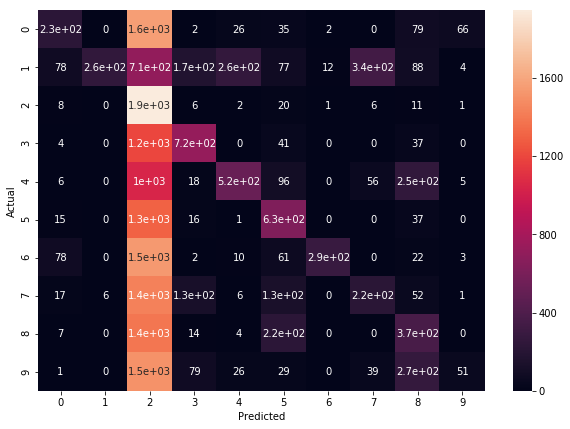

In [21]:
SVM_USPS_PredictedTarget=SVM_model.predict(USPSData)
Erms, SVM_USPS_Accu=ERMS(SVM_USPS_PredictedTarget,USPSTarget)
print("Erms:",Erms)
print("SVM USPS Accu:",SVM_USPS_Accu)

# Confusion Matrix
cm=confusion_matrix(USPSTarget,SVM_USPS_PredictedTarget)
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [23]:
#Model defination with number of trees
RF_model=RFC(n_estimators=50)
history2=RF_model.fit(TrainData,Train_Target)

# RF validation on Mnist Data Set

Erms: 0.7461903242471052
RF Val Accu 97.01
[[ 978    0    3    1    0    0    2    0    5    2]
 [   0 1051    4    3    1    2    1    1    1    0]
 [   2    0  968    0    2    2    2    6    4    4]
 [   1    0    5  996    0   11    0    5    8    4]
 [   0    4    1    0  956    1    1    1    3   16]
 [   5    0    9   11    2  866   10    1    9    2]
 [   1    0    0    0    0    4  959    0    3    0]
 [   1    5   13    1    4    0    0 1054    0   12]
 [   1    4    6    8    1    9    4    0  964   12]
 [   4    1    3   13   11    5    0    9    6  909]]


Text(69,0.5,'Actual')

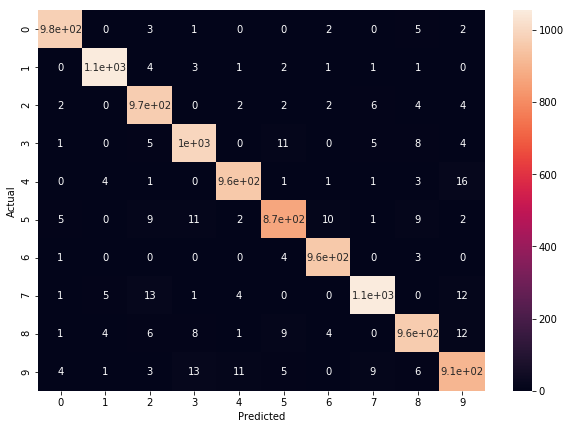

In [24]:
RF_PredictedTarget=RF_model.predict(ValData)
Erms, RF_Accu=ERMS(RF_PredictedTarget,Val_Target)
print("Erms:",Erms)
print("RF Val Accu",RF_Accu)

#Confusion Matrix
cm=confusion_matrix(Val_Target,RF_PredictedTarget)
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# RFC Testing on Mnist Test Data

Erms: 0.8232860985101108
RF Mnist Accu: 96.52
[[ 970    1    0    0    0    2    4    1    1    1]
 [   0 1122    1    3    1    2    2    1    3    0]
 [   6    0 1000    5    1    0    3   10    6    1]
 [   0    0   11  968    0    9    0    9    9    4]
 [   2    0    1    0  949    0    5    1    4   20]
 [   2    3    2   14    4  851    4    2    7    3]
 [   7    3    1    0    5    3  934    0    5    0]
 [   1    4   19    3    2    0    0  988    2    9]
 [   4    0    6   10    9    7    5    5  919    9]
 [   7    5    2   13   13    5    1    6    6  951]]


Text(69,0.5,'Actual')

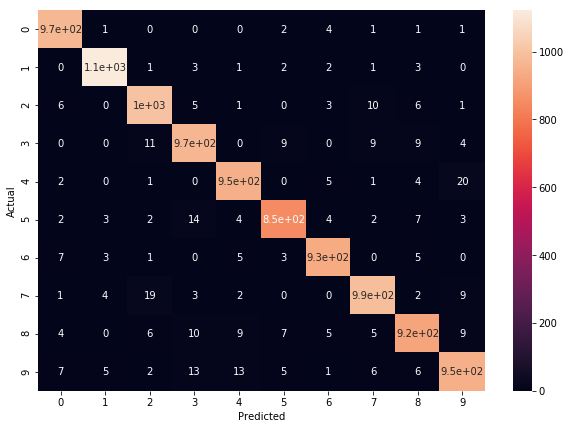

In [25]:
RF_Mnist_PredictedTarget=RF_model.predict(MnistData)
Erms, RF_Mnist_Accu=ERMS(RF_Mnist_PredictedTarget,MnistTarget)
print("Erms:",Erms)
print("RF Mnist Accu:",RF_Mnist_Accu)

#Confusion Matrix
cm=confusion_matrix(MnistTarget,RF_Mnist_PredictedTarget)
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# RFC Testing on USPS Test Data

Erms: 3.486718781374979
RF USPS Accu: 37.886894344717234
[[ 633   12  290   50  452  163   87  102    7  204]
 [  53  577  114  109   68   80   25  954   16    4]
 [  94   37 1213   89   65  184   36  264   13    4]
 [  32   16   98 1209   55  379    3  167   12   29]
 [  12  209   64   33 1051  161   18  384   36   32]
 [ 138   37  157  122   46 1324   40  120    7    9]
 [ 350   60  269   32  126  304  703  134   12   10]
 [  42  342  440  259   38  209   39  616    5   10]
 [  67   67  180  259  124  939   84  101  149   30]
 [  29  255  288  285  256  144   12  558   71  102]]


Text(69,0.5,'Actual')

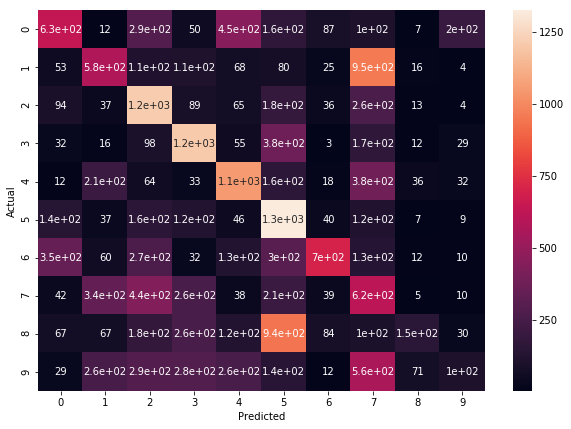

In [26]:
RF_USPS_PredictedTarget=RF_model.predict(USPSData)
Erms, RF_USPS_Accu=ERMS(RF_USPS_PredictedTarget,USPSTarget)
print("Erms:",Erms)
print("RF USPS Accu:",RF_USPS_Accu)

# Confusion Matrix
cm=confusion_matrix(USPSTarget,RF_USPS_PredictedTarget)
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Combinational Prediction Function

In [27]:
def voting(w,x,y,z):
    # Matrix with lenght 50k*10 for stroing the count of votes
    comp=np.zeros((len(x),10))
    #loop for each datapoints
    for i in range(0,len(x)):
        #fetching the predicted values
        w1=w[i]
        x1=x[i]
        y1=y[i]
        z1=z[i]
        #storing the votes
        comp[i][w1]=comp[i][w1]+1
        comp[i][x1]=comp[i][x1]+1
        comp[i][y1]=comp[i][y1]+1
        comp[i][z1]=comp[i][z1]+1
    # finding the majority vote
    voted=np.argmax(comp,axis=1)
    return voted

# Majority Voting for Mnist Test Data 

Erms: 0.74
Majority Voting Mnist Accu: 97.36
[[ 973    0    1    1    0    1    2    1    1    0]
 [   0 1127    2    1    0    1    1    1    2    0]
 [   7    0 1011    2    1    0    0    7    3    1]
 [   0    0    9  987    0    4    0    5    5    0]
 [   2    1    2    0  960    0    4    0    2   11]
 [   4    2    1   10    2  862    5    1    3    2]
 [   7    3    1    0    5    5  936    0    1    0]
 [   1    5   15    1    2    0    0  994    2    8]
 [   5    0    5    9    7    4    6    5  931    2]
 [   7    6    2   13   13    1    1    9    2  955]]


Text(69,0.5,'Actual')

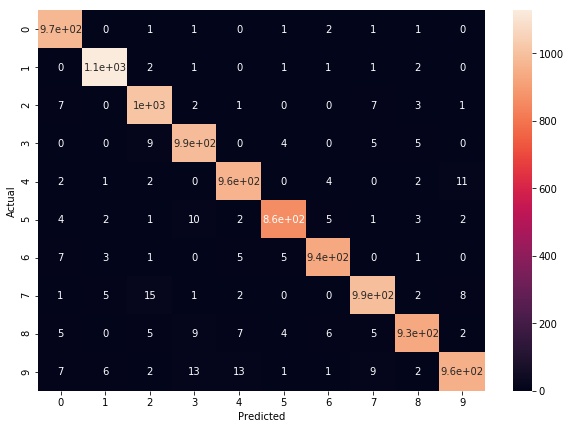

In [28]:
#Function call for combining the predicted values and voting the output
Mnist_vote=voting(Mnist_LogisticTarget,NN_Mnist_PredictedTarget,SVM_Mnist_PredictedTarget,RF_Mnist_PredictedTarget)
Erms, Accu=ERMS(Mnist_vote,MnistTarget)
print("Erms:",Erms)
print("Majority Voting Mnist Accu:",Accu)

# Confusion Matrix
cm=confusion_matrix(MnistTarget,Mnist_vote)
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Majority Voting for USPS Test Data 

Erms: 3.5122808552051032
Majority Voting USPS Accu: 39.63198159907996
[[ 697    7  569   31  232   77   44   32   60  251]
 [ 147  470  367  165  218   74   19  460   77    3]
 [ 127   17 1626   41   27   69   23   50   16    3]
 [  74    6  340 1285   13  206    0   36   27   13]
 [  38  118  174   24 1032  135   11  223  207   38]
 [ 131   18  413   96   18 1203   28   44   41    8]
 [ 370   23  673   22   62  134  660   16   20   20]
 [ 129  242  666  273   34  128   10  442   68    8]
 [ 199   30  437  187   54  560   66   52  397   18]
 [  44  207  485  307  147   57    3  399  237  114]]


Text(69,0.5,'Actual')

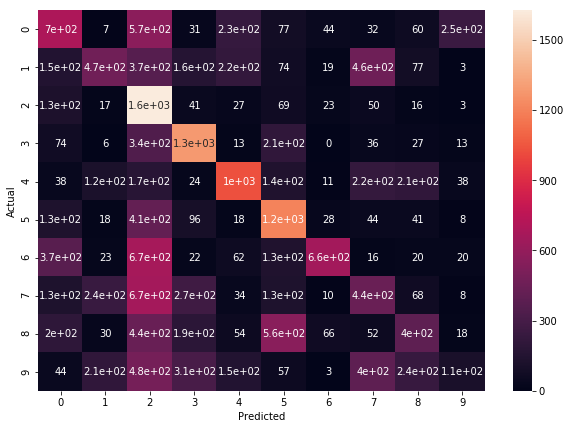

In [29]:
#Function call for combining the predicted values and voting the output
USPS_vote=voting(USPS_LogisticTarget,NN_USPS_PredictedTarget,SVM_USPS_PredictedTarget,RF_USPS_PredictedTarget)
Erms, Accu=ERMS(USPS_vote,USPSTarget)
print("Erms:",Erms)
print("Majority Voting USPS Accu:",Accu)

# Confusion Matrix
cm=confusion_matrix(USPSTarget,USPS_vote)
print(cm)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')